## SOBM Simulation
- Juan Sebastián Cárdenas Rodríguez  
  201710008101  
  jscardenar@eafit.edu.co

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline

N = 200 # Number of SOBM's
delta_t = 0.01 # Time skips
np.random.seed(103948440) # Seed to assure same result

## Standard One-Dimensional Browninan Motion.

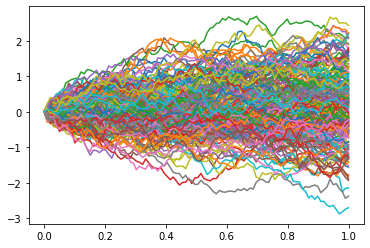

In [3]:
mb = np.zeros((N, int(1 / delta_t)))
for i in range(N):
    for j in range(1, int(1 / delta_t)):
        mb[i, j] = mb[i , j - 1] + np.sqrt(delta_t) * np.random.normal(0, 1)
        
t = np.linspace(0, 1, int(1 / delta_t))
        
for i in range(N):
    plt.plot(t, mb[i, :])
plt.show()

## Brownian Bridge
Let's show $\text{Var}\left[B_t\right] \ne t$

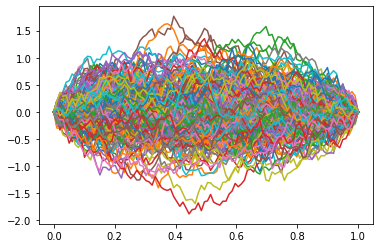

sigma^2 = 0.2622396505961097


In [9]:
bb = np.zeros((N, int(1 / delta_t)))
for i in range(N):
    bb[i, :] = mb[i, :] - np.dot(t, mb[i, -1])
    plt.plot(t, bb[i, :])
plt.show()

# Test to show not SOBM
t0 = 0.5 # Test in time
var = np.var(bb[:, int(t0 / delta_t)], ddof=1)
print("sigma^2 =", var)

## Brownian Drift
Let's show $\text{E}\left[B_t\right] \ne 0$

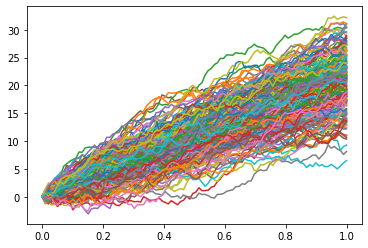

mu = 10.544485815877188


In [14]:
mu_p = 20 # Parameter 
sigma_p = 5 # Parameter

bd = np.zeros((N, int(1 / delta_t)))
for i in range(N):
    bd[i, :] = mu_p * t + sigma_p * mb[i, :]
    plt.plot(t, bd[i, :])
plt.show()

# Test to show not SOBM
t0 = 0.5 # Test in time
exp = np.mean(bd[:, int(t0 / delta_t)])
print("mu =", exp)

## Geometric Brownian
Let's show $\text{E}\left[B_t\right] \ne 0$

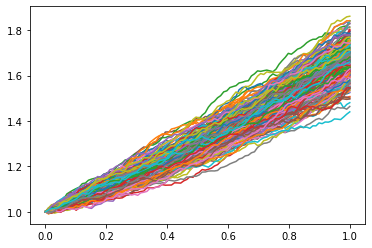

mu = 1.2938201813465935


In [18]:
alpha = 0.5 # Parameter
lamda = 0.05 # Parameter

bg = np.zeros((N, int(1 / delta_t)))
for i in range(N):
    bg[i, :] = np.exp(alpha * t + lamda * mb[i, :])
    plt.plot(t, bg[i, :])
plt.show()

# Test to show not SOBM
t0 = 0.5 # Test in time
mu = np.mean(bg[:, int(t0 / delta_t)])
print("mu =", mu)

## White Noise
Let's show $\text{Var}\left[B_t\right] \ne t$

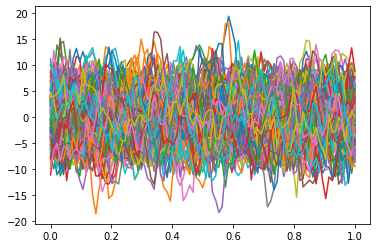

var = 22.268183173073883


In [44]:
h = 0.05 # Parameter
wn = np.zeros((N, int((1 - h) / delta_t)))
t_alt = np.linspace(0, 1, int((1 - h) / delta_t))
for i in range(N):
    wn[i, :] = (mb[i, int(h / delta_t):] - mb[i, 0:int((1 - h) / delta_t)]) / h
    plt.plot(t_alt, wn[i, :])
plt.show()

# Test to show not SOBM
t0 = 0.5 # Test in time
var = np.var(wn[:, int(t0 / delta_t)], ddof=1)
print("var =", var)